In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Making Plots Actually Look Nice

If one has SciencePlots (https://github.com/garrettj403/SciencePlots) installed has additional options for matplotlib

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

# Quick Plotting

## Line Plots

Simple plotting commands to look at data quickly

In [3]:
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

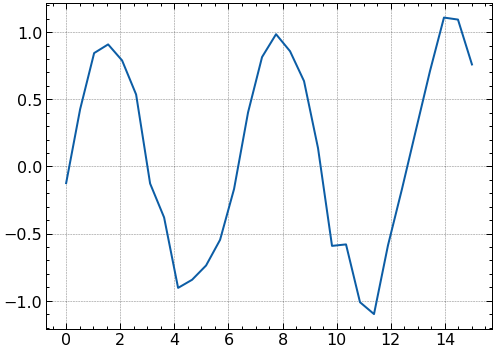

In [4]:
plt.plot(x,y)

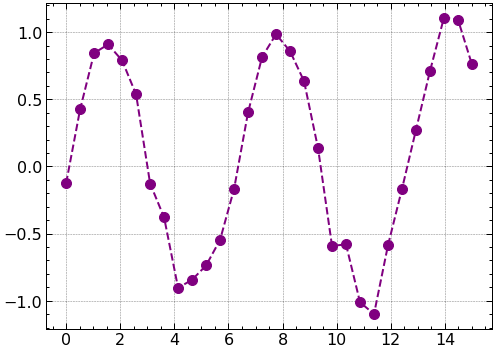

In [5]:
plt.plot(x,y, 'o--', color='purple', lw=2, ms=10)

Figure size

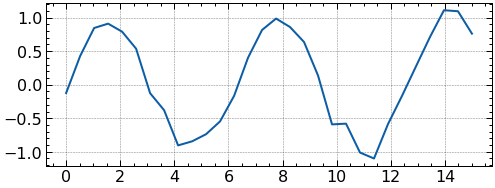

In [6]:
plt.figure(figsize=(8,3))
plt.plot(x,y)

Axis labels

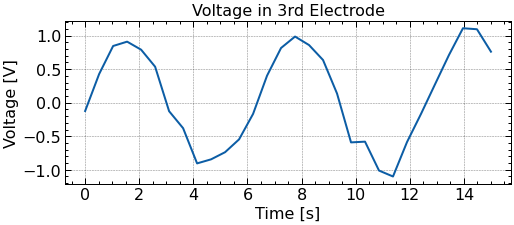

In [7]:
plt.figure(figsize=(8,3))
plt.plot(x,y)
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.show()

Legend

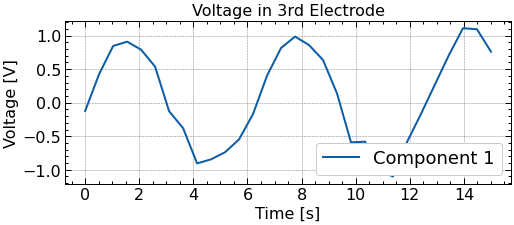

In [8]:
plt.figure(figsize=(8,3))
plt.plot(x,y, label='Component 1')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='lower right', fontsize=18)
plt.show()

Easy to have multiple lines on same plot

In [9]:
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

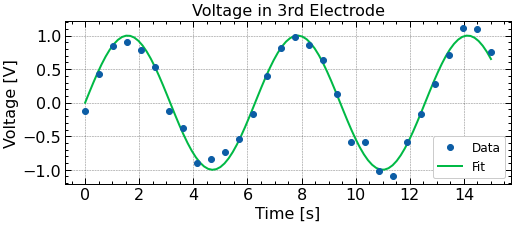

In [10]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='lower right', fontsize=12)
plt.show()

$x$ and $y$ limits

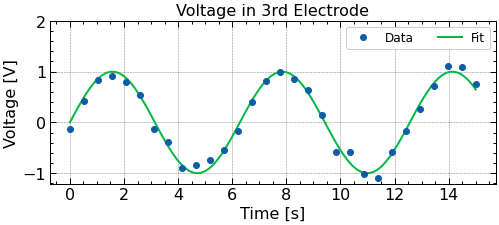

In [11]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='upper right', fontsize=12, ncol=2)
plt.ylim(top=2)
plt.show()

## Histograms

In [12]:
res = np.random.randn(1000)*0.2 + 0.4

Quick Histogram

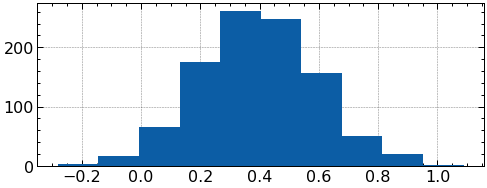

In [13]:
plt.figure(figsize=(8,3))
plt.hist(res)
plt.show()

Change number of bins

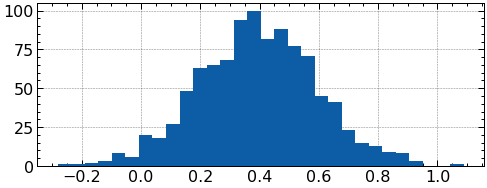

In [14]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30)
plt.show()

Convert to density plot

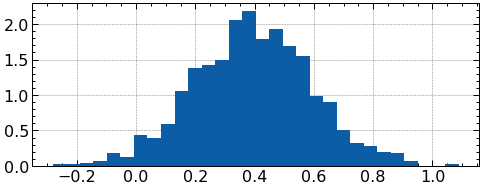

In [15]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30, density=True)
plt.show()

Differnt style of bins (useful for plotting multiple histograms)

In [16]:
res2 = np.random.randn(1000)*0.2 + 0.4

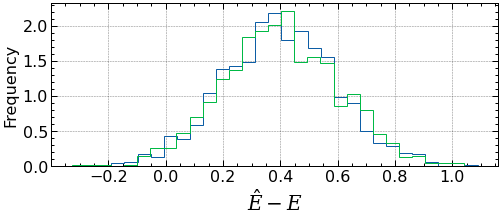

In [17]:
plt.figure(figsize=(8,3))
plt.hist(res, bins=30, density=True, histtype='step')
plt.hist(res2, bins=30, density=True, histtype='step')
plt.xlabel('$\hat{E}-E$', fontsize=20)
plt.ylabel('Frequency')
plt.show()

# A More Advanced API

For more complicated plots, such as

* Multiple subplots on 1 figure
* Conveniently adding text to plots
* Creating animations

one needs to use a slightly more advanced API

## Single Axes in one Figure

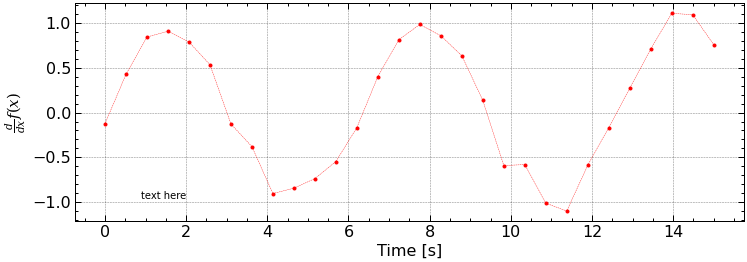

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)
plt.show()

## Multiple axes in 1 figure

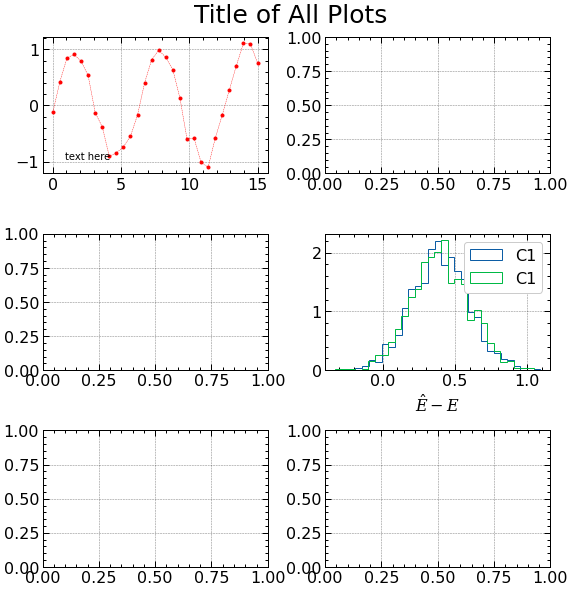

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(8,8))
ax = axes[0][0]
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax = axes[1][1]
ax.hist(res, bins=30, density=True, histtype='step', label='C1')
ax.hist(res2, bins=30, density=True, histtype='step', label='C1')
ax.set_xlabel('$\hat{E}-E$')
ax.legend()
fig.tight_layout()
fig.suptitle('Title of All Plots', y=1.03, fontsize=25)
plt.show()

Can make x-ticks smaller

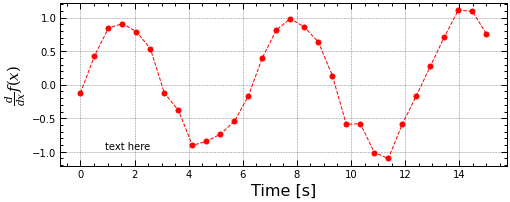

In [20]:
plt.style.use(['science', 'notebook', 'grid'])
fig, ax = plt.subplots(1, 1, figsize=(8,3))
ax.plot(x, y, 'o--', color='r', lw=1, ms=5)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid('minor')
plt.show()

# Example

Creating the following plot

In [21]:
res_a1 = 0.2*np.random.randn(1000)+0.4
res_b1 = 0.25*np.random.randn(1000)+0.4
res_a2 = 0.21*np.random.randn(1000)+0.3
res_b2 = 0.22*np.random.randn(1000)+0.3

Good habit to come up with complicated strings beforehand

In [22]:
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

Make plot

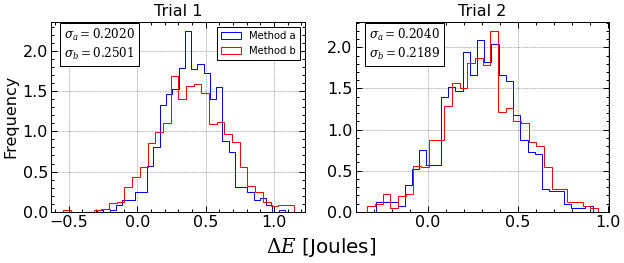

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))
ax = axes[0]
ax.hist(res_a1, bins=30, density=True, histtype='step', label='Method a', color='blue')
ax.hist(res_b1, bins=30, density=True, histtype='step', label='Method b', color='red')
ax.text(0.05, 0.81, textstr1, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12)

ax.legend(fontsize=10, fancybox=False, edgecolor='black')
ax.set_ylabel('Frequency')
ax.set_title('Trial 1')
ax = axes[1]
ax.hist(res_a2, bins=30, density=True, histtype='step', label='Method 1', color='blue')
ax.hist(res_b2, bins=30, density=True, histtype='step', label='Method 2', color='red')
ax.text(0.05, 0.81, textstr2, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12)
ax.set_title('Trial 2')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha='center', size=20)
plt.savefig('trial.png', dpi=200)
plt.show()

# 2D Plots

Generate some data

In [24]:
plt.style.use(['default'])

In [25]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

## Filled-in contour plots

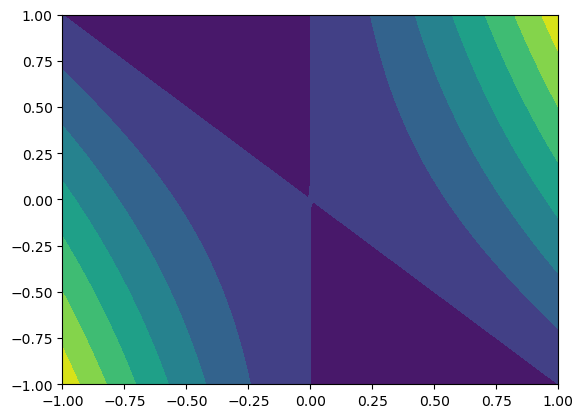

In [26]:
plt.contourf(x,y,z)

Can make them more dense ny changing `levels` and also can change colormap

* See https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py

Can use `vmin` and `vmax` to adjust the color range

* See https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html for all settings

Text(0, 0.5, 'Vertical Position [m]')

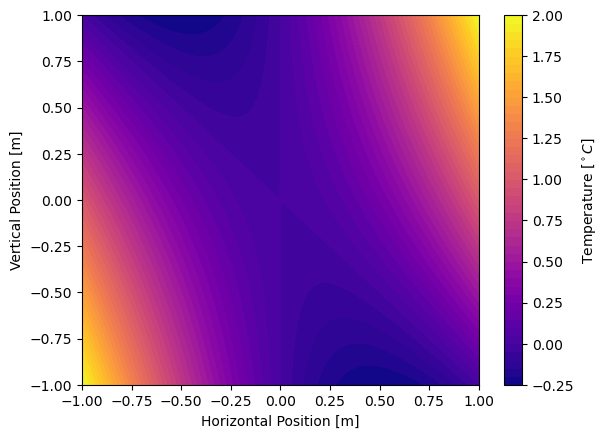

In [27]:
plt.contourf(x,y,z, levels=50, cmap='plasma')
plt.colorbar(label='Temperature [$^\circ C$]')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')

## Contour Plot

Sometimes, the following is preferred:

<a list of 26 text.Text objects>

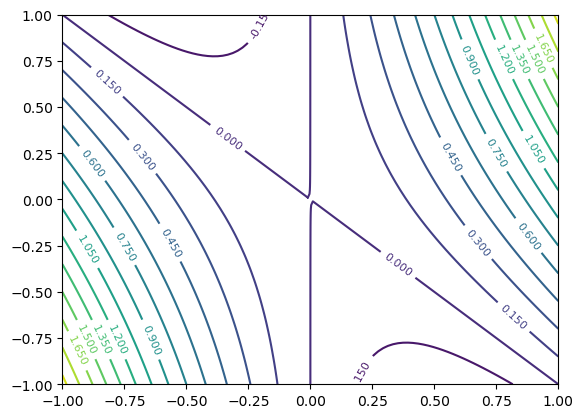

In [28]:
cs = plt.contour(x,y,z, levels=20)
plt.clabel(cs, fontsize=8)

## 3D Surface Plot

3D Surface Plot (Generally not preferred). However, they tend to work well in animations (we'll get to this later)

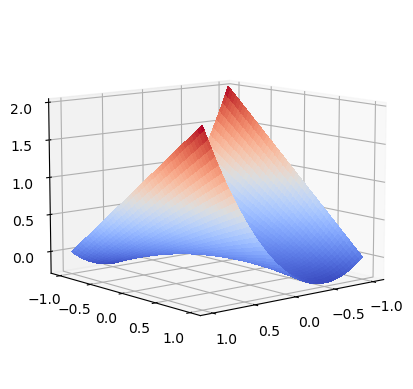

In [29]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=50)

## StreamPlots

For plotting vector fields

In [30]:
w = 3
_ = np.linspace(-3,3,100)
X, Y = np.meshgrid(_,_)
U = -1 - X**2 + Y
V = 1 + X - Y**2
speed = np.sqrt(U**2 + V**2)

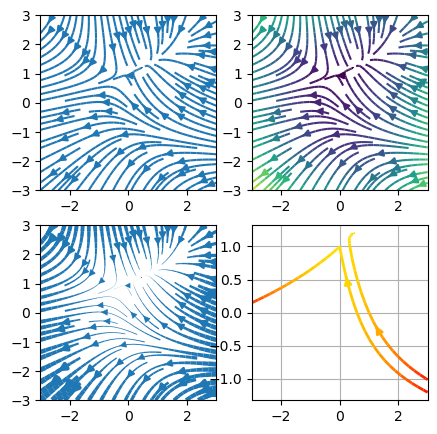

In [31]:
fig, axes = plt.subplots(2,2,figsize=(5,5))
ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax = axes[0][1]
ax.streamplot(X, Y, U, V, color=speed)
ax = axes[1][0]
lw = 5*speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth=lw)
ax = axes[1][1]
seed_points = np.array([[0,1], [1,0]])
ax.streamplot(X, Y, U, V, color=U, linewidth=2,
                      cmap='autumn', start_points=seed_points)
ax.grid()

# Image Reading

In [32]:
im = plt.imread('images/flower.png')

Plot image

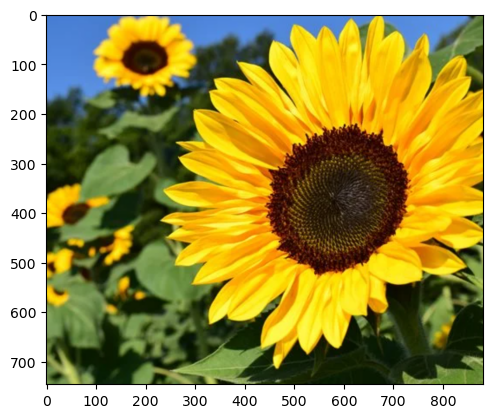

In [33]:
plt.imshow(im)

# Animations

Animations require relating the time of your problem to the frame of the animation, then specifying the frames per second

* Below is a $\sin$ wave moving at 3m/s. Translate this into an animation

In [34]:
def f(x,t):
    return np.sin(x-3*t)

x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
F = f(X, T)

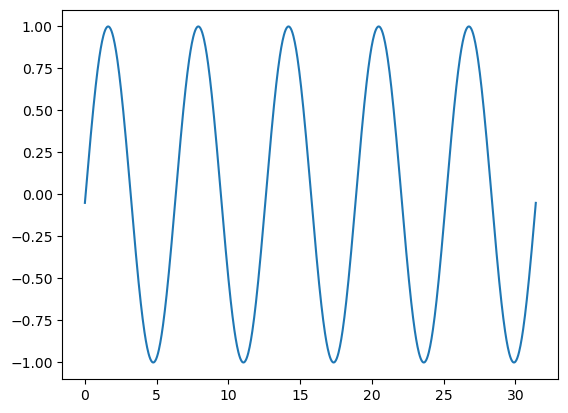

In [35]:
plt.plot(x, F[1])

Create animation

In [36]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

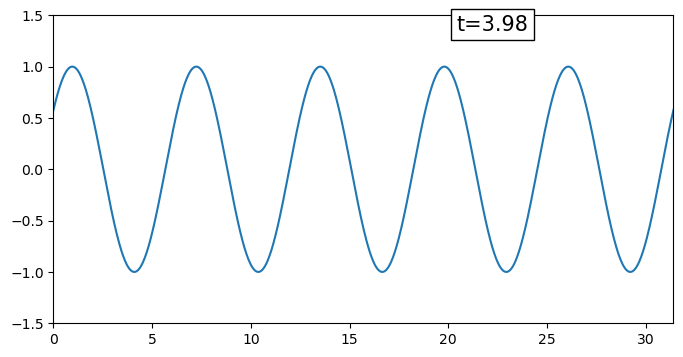

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('images/ani.gif',writer='pillow',fps=50,dpi=100)

The animation function can be used in other ways too. One can create 3D rotating gifs of surfaces.

In [38]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

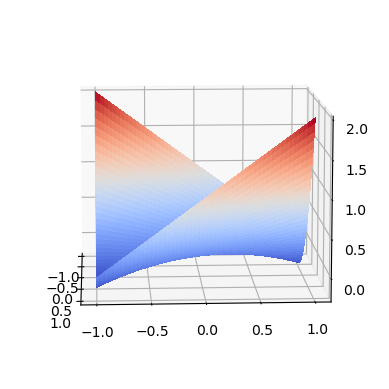

In [39]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)
    
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('images/ani2.gif',writer='pillow',fps=30,dpi=100)